In [ ]:
# install libraries
!pip install yfinance

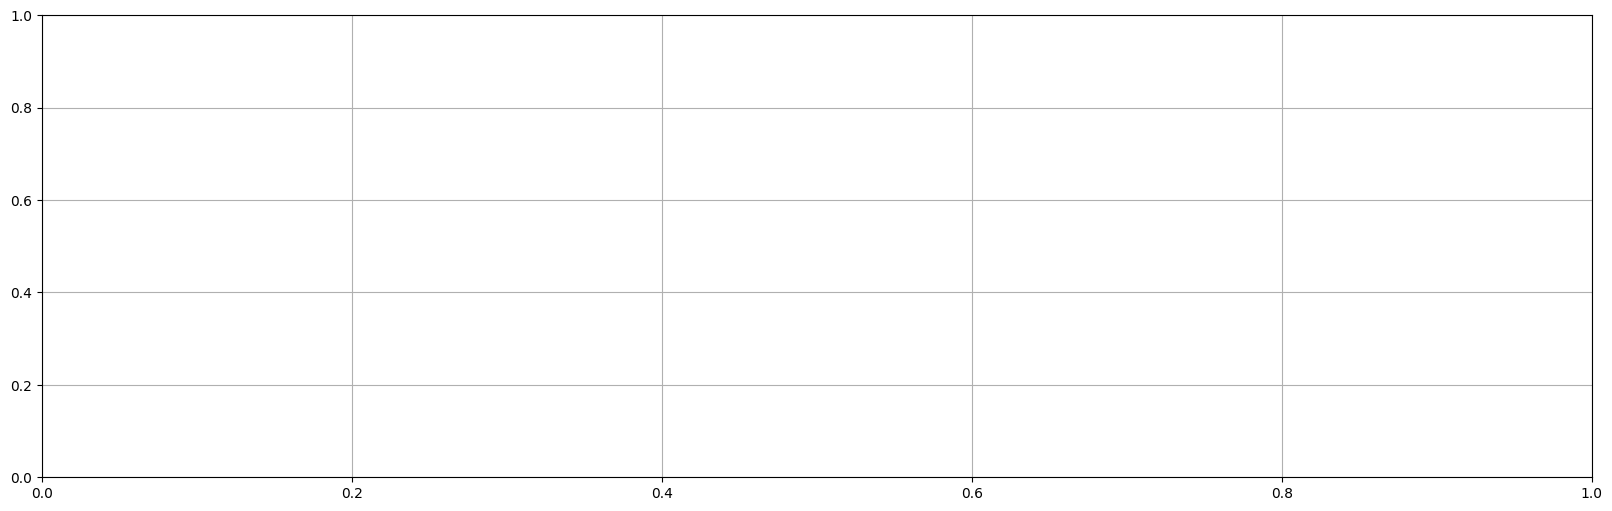

In [ ]:
#Imports
import numpy as np
import pandas as pd
#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

import time
from datetime import date

#Question 1: [Macro] Average growth of GDP in 2023
##What is the average growth (in %) of GDP in 2023?
###Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [ ]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=2022, month=1, day=1)
print(f'Period for indexes: {start} to {end} ')
# Real Potential Gross Domestic Product (GDPC1), QUARTERLY
# https://fred.stlouisfed.org/series/GDPC1
df_gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)
df_gdpc1


Year = 2024; month= 4; day=18
Period for indexes: 2022-01-01 to 2024-04-18 


,GDPC1
DATE,
2022-01-01,21738.871
2022-04-01,21708.160
2022-07-01,21851.134
2022-10-01,21989.981
2023-01-01,22112.329
2023-04-01,22225.350
2023-07-01,22490.692
2023-10-01,22679.255


In [ ]:
df_gdpc1['GDPC1_yoy']=df_gdpc1['GDPC1']/df_gdpc1['GDPC1'].shift(4)-1
df_gdpc1

,GDPC1,GDPC1_yoy
DATE,,
2022-01-01,21738.871,NaN
2022-04-01,21708.160,NaN
2022-07-01,21851.134,NaN
2022-10-01,21989.981,NaN
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


##Result Q1.

In [ ]:
year_over_year_avg_gdpc1=df_gdpc1.loc['2023']['GDPC1_yoy'].mean()
print(f"The average growth of GDP in 2023 is {year_over_year_avg_gdpc1*100:.1f}%" )

The average growth of GDP in 2023 is 2.5%


#Question 2. [Macro] Inverse "Treasury Yield"
##Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

##Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

##(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [ ]:
end = date(year=2024,month=4,day=9)
# end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=2000, month=1, day=1)
print(f'Period for indexes: {start} to {end} ')

df_dgs2 = pdr.DataReader("DGS2", "fred", start=start)
df_dgs10 = pdr.DataReader("DGS10", "fred", start=start)
df=df_dgs2.join(df_dgs10)
df['dif_daily'] = df['DGS10']-df['DGS2']
df

Year = 2024; month= 4; day=9
Period for indexes: 2000-01-01 to 2024-04-09 


,DGS2,DGS10,dif_daily
DATE,,,
2000-01-03,6.38,6.58,0.20
2000-01-04,6.30,6.49,0.19
2000-01-05,6.38,6.62,0.24
2000-01-06,6.35,6.57,0.22
2000-01-07,6.31,6.52,0.21
...,...,...,...
2024-04-10,4.97,4.55,-0.42
2024-04-11,4.93,4.56,-0.37
2024-04-12,4.88,4.50,-0.38


In [ ]:
df

,DGS2,DGS10,dif_daily
DATE,,,
2000-01-03,6.38,6.58,0.20
2000-01-04,6.30,6.49,0.19
2000-01-05,6.38,6.62,0.24
2000-01-06,6.35,6.57,0.22
2000-01-07,6.31,6.52,0.21
...,...,...,...
2024-04-10,4.97,4.55,-0.42
2024-04-11,4.93,4.56,-0.37
2024-04-12,4.88,4.50,-0.38


###Result Q2A

In [ ]:
print(f"The minimun value for DGS2 after 2000 is {df['dif_daily'].min():.1f}")

The minimun value for DGS2 after 2000 is -1.1


Text(0.5, 1.0, 'Daily difference ')

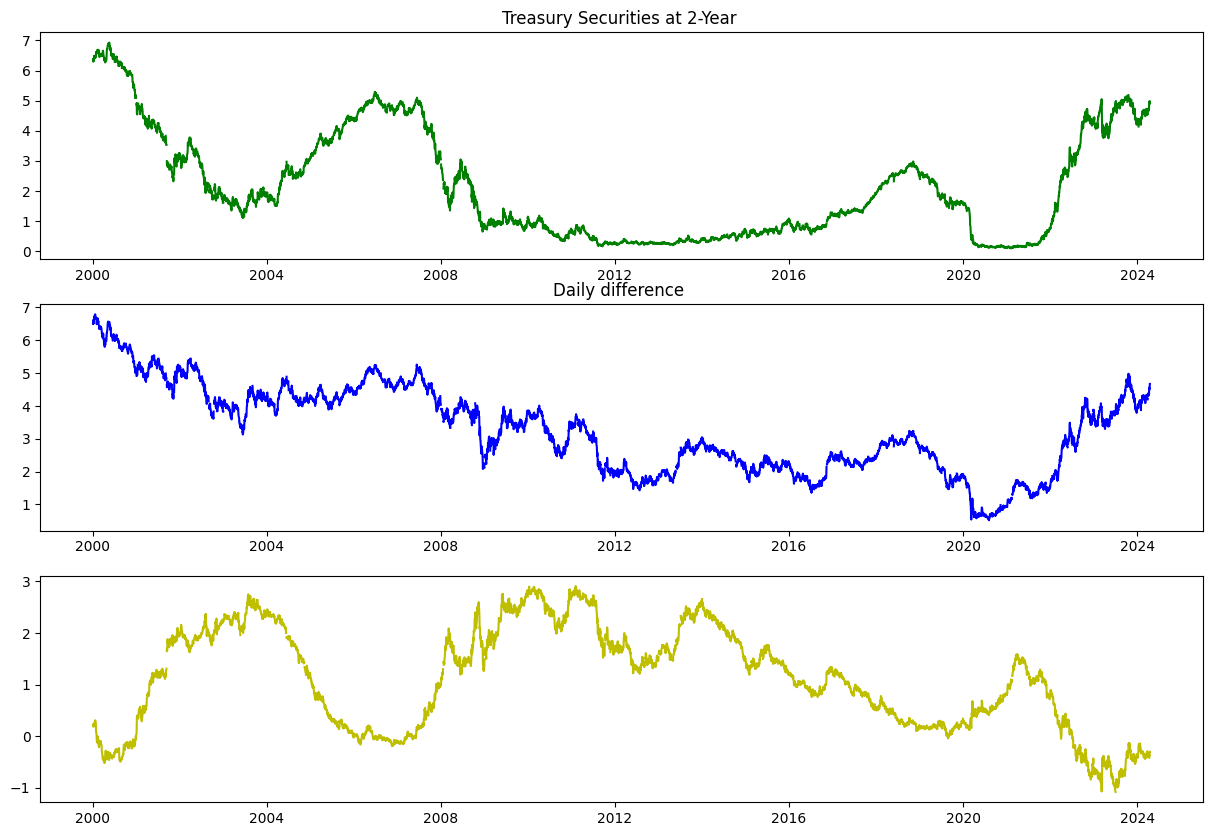

In [ ]:
fig,ax=plt.subplots(nrows=3, ncols=1,figsize=(15,10))
df_plot=df
# df_plot=df.loc['2021-02':'2023-07']
ax[0].plot(df_plot['DGS2'],c='g',label='DGS2')
ax[0].set_title("Treasury Securities at 2-Year ")
ax[1].plot(df_plot['DGS10'],c='b',label='DGS10')
ax[1].set_title("Treasury Securities at 10-Year ")
ax[2].plot(df_plot['dif_daily'],c='y',label='Diff_daily')
ax[1].set_title("Daily difference ")
# plt.ylabel("percent")
# plt.legend(loc="upper right")

###Looking at the graph, we can see that every time the curve is with a negative trend, it is more profitable to invest for 2 years instead of 10 years.

#Question 3. [Index]
##Which Index is better recently?

###Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

###Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

###(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)



In [ ]:
end = date(year=2024,month=4,day=9)
start = date(year=2019,month=4,day=9)
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

# start = date(year=end.year-5, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=9
Period for indexes: 2019-04-09 to 2024-04-09 


In [ ]:
# df_sp500 =pd.DataFrame( yf.download(tickers ="^GSPC",start=start,end=end,interval = "1d")['Adj Close'])
# df_mxx= pd.DataFrame(yf.download(tickers = "^MXX",start=start,end=end,interval = "1d")['Adj Close'])
# df_ibex= pd.DataFrame(yf.download(tickers = "^IBEX",start=start,end=end,interval = "1d")['Adj Close'])
# df_eur=pd.DataFrame(yf.download(tickers = "DAX",start=start,end=end,period = "max",interval = "1d")['Adj Close'])
df =yf.download(tickers = ["^GSPC","^MXX","^IBEX","DAX"],start=start,end=end,interval = "1d")['Adj Close']
df

[*********************100%%**********************]  4 of 4 completed


Ticker,DAX,^GSPC,^IBEX,^MXX
Date,,,,
2019-04-09,22.964157,2878.199951,9407.799805,45151.628906
2019-04-10,23.079109,2888.209961,9406.500000,44909.140625
2019-04-11,23.080864,2888.320068,9445.400391,44580.058594
2019-04-12,23.341480,2907.409912,9468.500000,44686.058594
2019-04-15,23.384478,2905.580078,9497.099609,44625.781250
...,...,...,...,...
2024-04-02,32.860001,5205.810059,10975.599609,57581.808594
2024-04-03,33.259998,5211.490234,11032.299805,57503.390625
2024-04-04,32.901001,5147.209961,11090.900391,57882.761719


In [ ]:
# df_sp500.columns=['SP500']
# df_mxx.columns=['MXX']
# df_ibex.columns=['IBEX']
# df_eur.columns=['EUR']
# df = df_sp500.join(df_mxx).join(df_ibex).join(df_eur)

<Axes: xlabel='Date'>

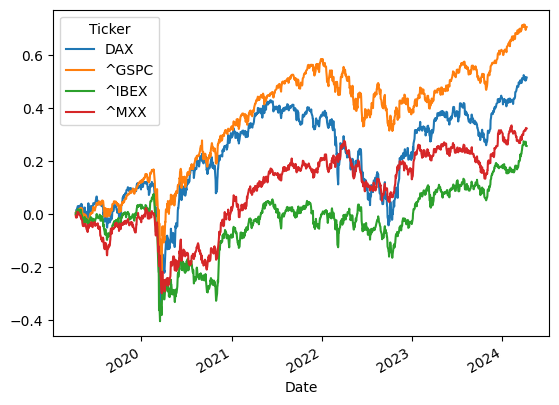

In [ ]:
df.pct_change().cumsum().plot()

In [ ]:
columns=df.columns
rates=df.iloc[-1]/df.iloc[0]-1
rate_max=rates.max()
print("5 years rates:")
print("-"*30)
print("index\t rates")
index_max=''
rate_val=0
for col in columns:
  print(f"{col}\t{rates[col]*100:.1f}%")
  if rates[col]>rate_val:
    index_max=col
    rate_val=rates[col]

print()
print("-"*30)
print("")

5 years rates:
------------------------------
index	 rates
DAX	44.7%
^GSPC	80.8%
^IBEX	16.0%
^MXX	28.4%

------------------------------



###Result Q3

In [ ]:
print(f"The higher grouth index is the '{index_max}' with a rate of {rate_max*100:.1f}%")


The higher grouth index is the 'SP500' with a rate of 80.8%


#Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks
Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [ ]:
df= yf.download(['2222.SR','BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM'],start="2023-01-01",end="2023-12-31")['Adj Close']

[*********************100%%**********************]  6 of 6 completed


###Result Q4

In [ ]:
ll_ratio=dict((df.max()-df.min())/df.max())
print(f'ticker   \t Rate')
for r in ll_ratio :
  print(f'{r}     \t {ll_ratio[r]:.2f}')

ticker   	 Rate
2222.SR     	 0.21
AAPL     	 0.37
BRK-B     	 0.21
GOOG     	 0.39
JPM     	 0.28
MSFT     	 0.42


#Question 5. [Stocks] Dividend Yield
##Find the largest dividend yield for the same set of stocks

##Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

##Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

##Find the maximm value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [ ]:
stocks = ['2222.SR','BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
df_adj_close = yf.download(stocks,start='2023-12-20',end='2023-12-31',progress=False)['Adj Close']
div_sum_array=[]
for st in stocks:
  div_sum=yf.Ticker(st).dividends.loc['2023'].sum()
  # print(div_sum)
  div_sum_array.append(div_sum)
df=pd.DataFrame(data=div_sum_array,index=stocks,columns=['Dividends'])
df=df.join(df_adj_close.fillna(method='ffill').iloc[-1])
df.columns=['Dividends','Last Year Adj Close']
df['Dividend Yield']=df['Dividends']/df['Last Year Adj Close']
df

,Dividends,Last Year Adj Close,Dividend Yield
2222.SR,0.910764,32.877789,0.027701
BRK-B,0.000000,356.660004,0.000000
AAPL,0.950000,192.284637,0.004941
MSFT,2.790000,375.345886,0.007433
GOOG,0.000000,140.929993,0.000000
JPM,4.050000,168.077118,0.024096


###Result Q5

In [ ]:
print("Ticker \tDividend Yield\tMax")
for item,row in df.iterrows():
  print(f'{row.name.ljust(5)}\t {row.get("Dividend Yield")*100:.1f}% ' \
   f'\t\t{"*" if df["Dividend Yield"].max()==row.get("Dividend Yield") else " "}')


Ticker 	Dividend Yield	Max
2222.SR	 2.8% 		*
BRK-B	 0.0% 		 
AAPL 	 0.5% 		 
MSFT 	 0.7% 		 
GOOG 	 0.0% 		 
JPM  	 2.4% 		 


#Question 6. [Exploratory] Investigate new metrics

##Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

###Result Q6
* Metrics that I consider Useful are:
  * Sharpe Ratio :Calculates returns by considering the total market volatility
  * Profit factor: Gross profit divided by gross losses
  * Max Drawdonw : Max loss in a period of time.


#Question 7. [Exploratory] Time-driven strategy description around earnings releases

##Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).
##Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.